In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('project_25 - Sheet1 (1).csv')

# Clean dataset
data.replace('#NUM!', np.nan, inplace=True)
data.dropna(inplace=True)
for col in ['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Define features and target
X = data[['Ambient Temperature', 'Core Temperature', 'Voltage']]
y = data['Output']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model3 = LinearRegression()

# Ensemble model
ensemble_model = VotingRegressor(
    estimators=[
        ('rf', model1),
        ('gbr', model2),
        ('lr', model3)
    ]
)

# Train model
ensemble_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ensemble_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))


MSE: 0.0031383511771578888
R^2: 0.9626924096018759


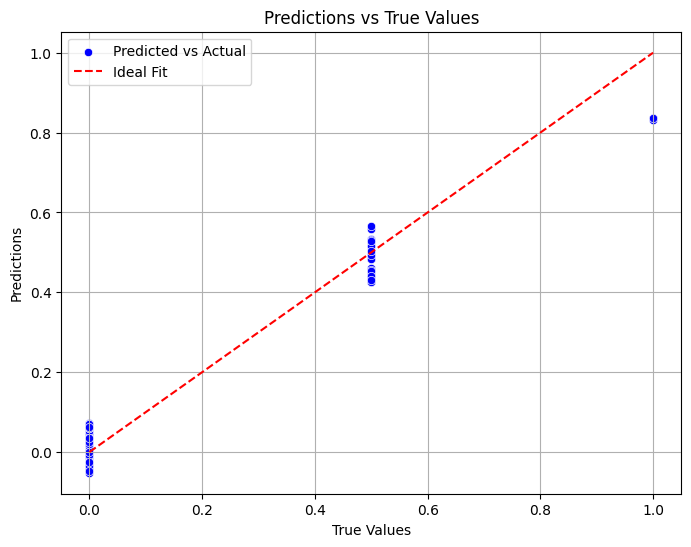

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predictions vs. true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.legend()
plt.grid()
plt.show()


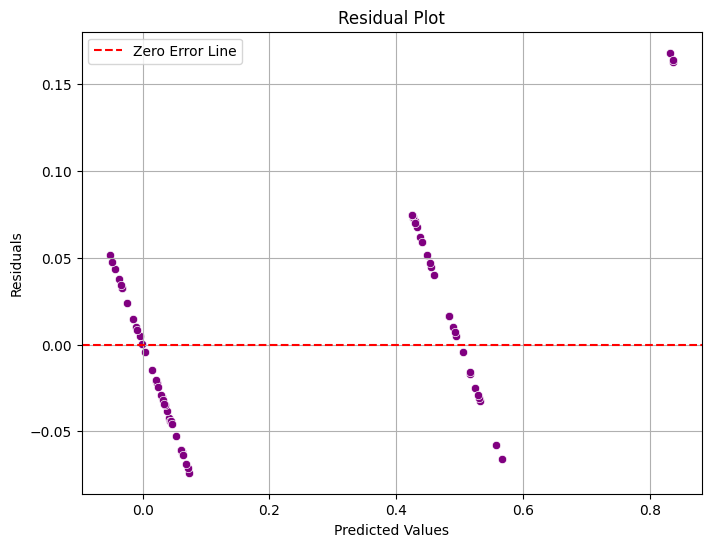

In [3]:
# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color="purple")
plt.axhline(y=0, color='r', linestyle='--', label="Zero Error Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.show()


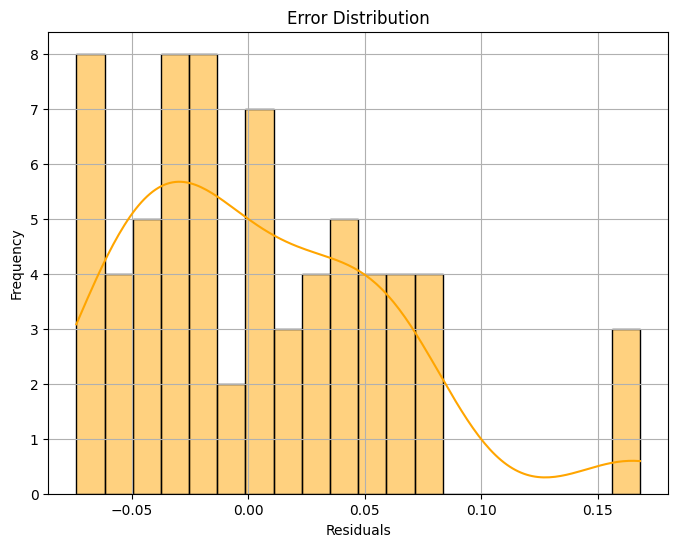

In [4]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color="orange")
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


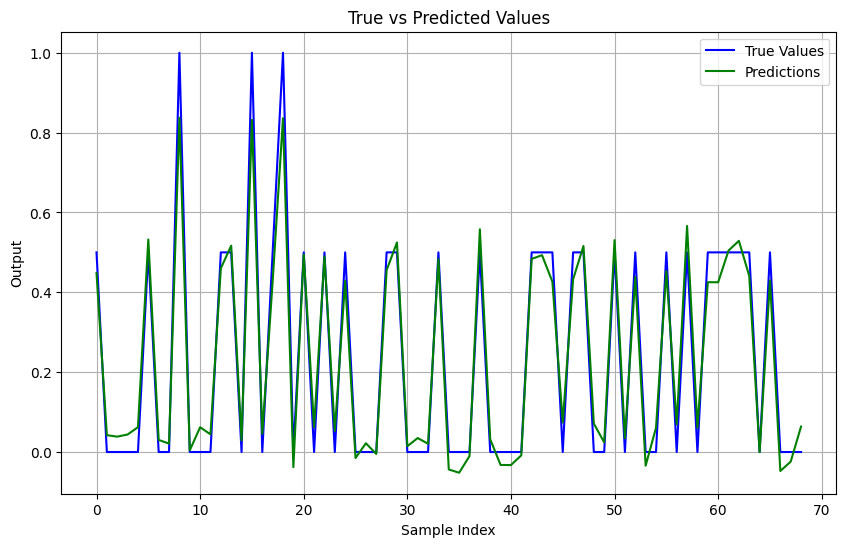

In [5]:
# Line plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="True Values", color="blue")
plt.plot(y_pred, label="Predictions", color="green")
plt.title("True vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()


In [6]:
# Assuming X_train and y_train are your training features and labels
model1.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\501013900.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


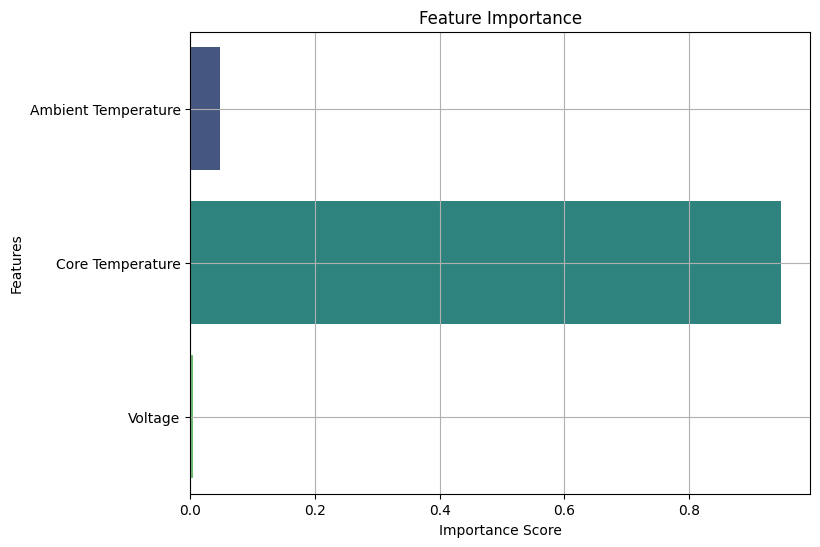

In [7]:
# Retrieve feature importances
importances = model1.feature_importances_
feature_names = X.columns

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid()
plt.show()


In [8]:
# User-specific input
user_ambient_temp = 24.49  # Example input for Ambient Temperature
user_core_temp = 35.57     # Example input for Core Temperature
user_voltage = 2.77      # Example input for Voltage

# Create input array
user_input = np.array([[user_ambient_temp, user_core_temp, user_voltage]])

# Predict output for user input
user_prediction = ensemble_model.predict(user_input)
print(f"Predicted Output for user input: {user_prediction[0]}")

Predicted Output for user input: 0.4239028399519538


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# User-specific input
user_ambient_temp = 28.59  # Example input for Ambient Temperature
user_core_temp = 50.75     # Example input for Core Temperature
user_voltage = 2.8      # Example input for Voltage

# Create input array
user_input = np.array([[user_ambient_temp, user_core_temp, user_voltage]])

# Predict output for user input
user_prediction = ensemble_model.predict(user_input)
print(f"Predicted Output for user input: {user_prediction[0]}")

Predicted Output for user input: 0.9934543419027656


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\4164040441.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


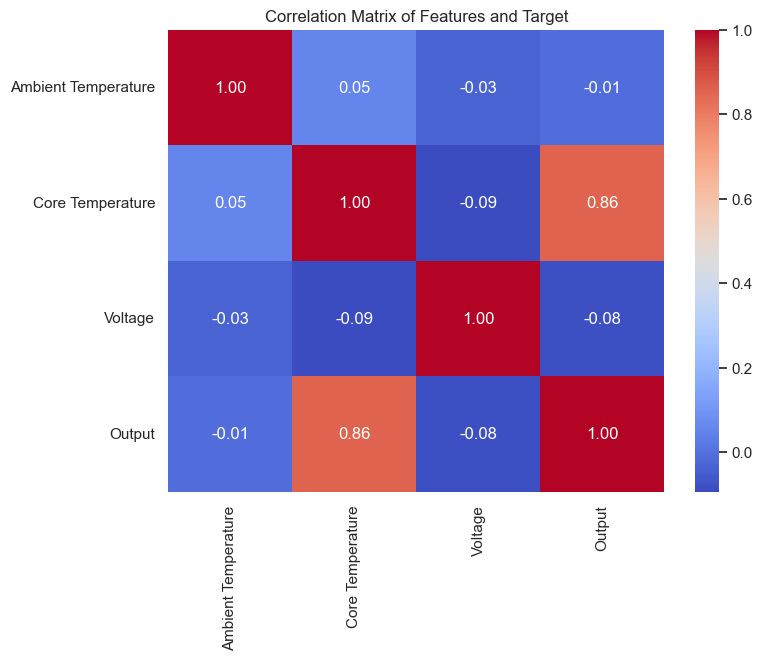

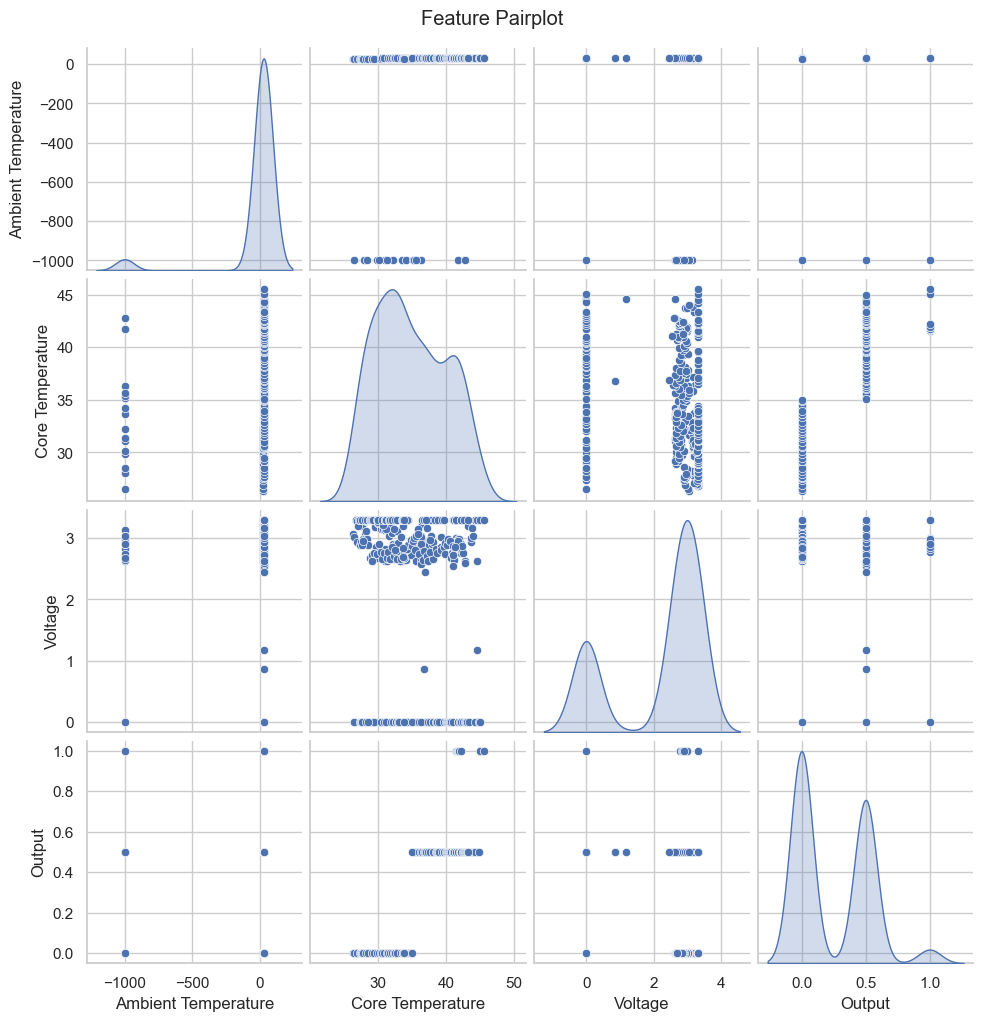

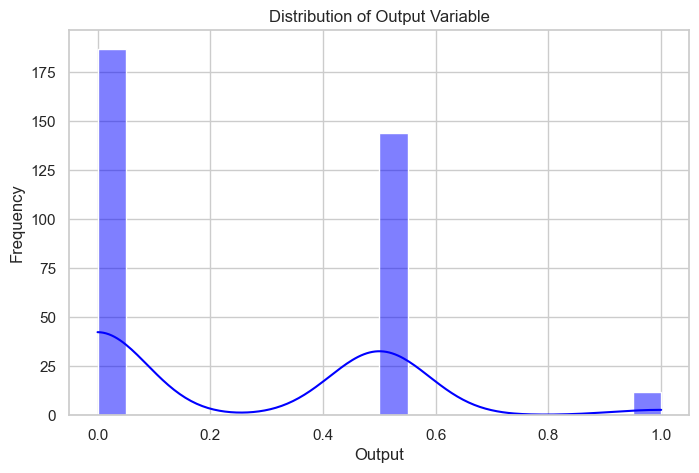

C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\4164040441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


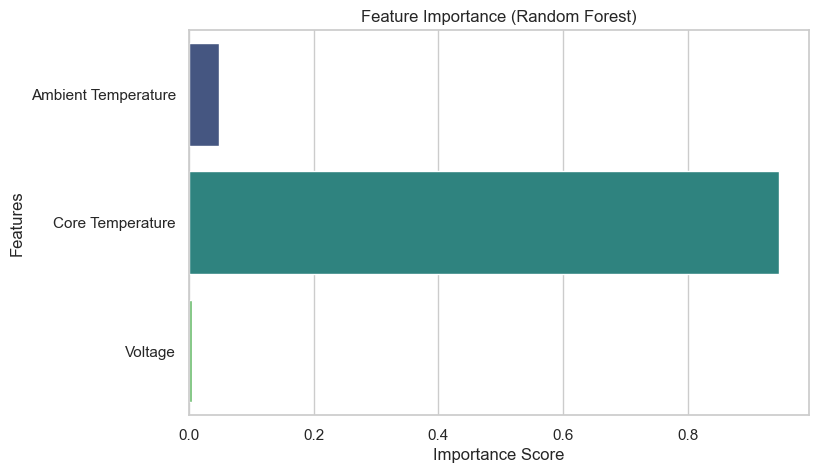

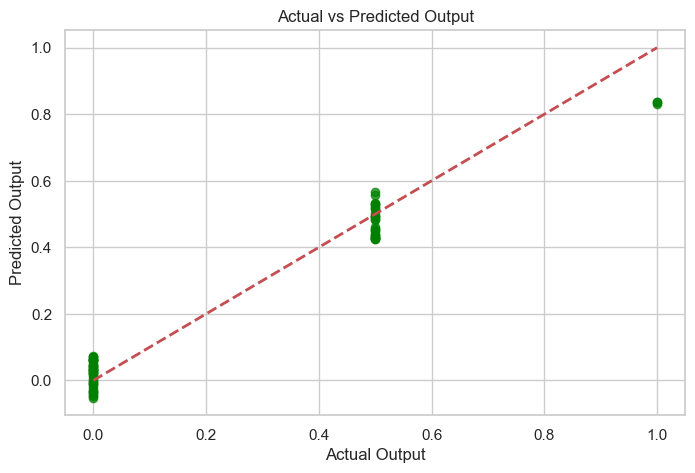

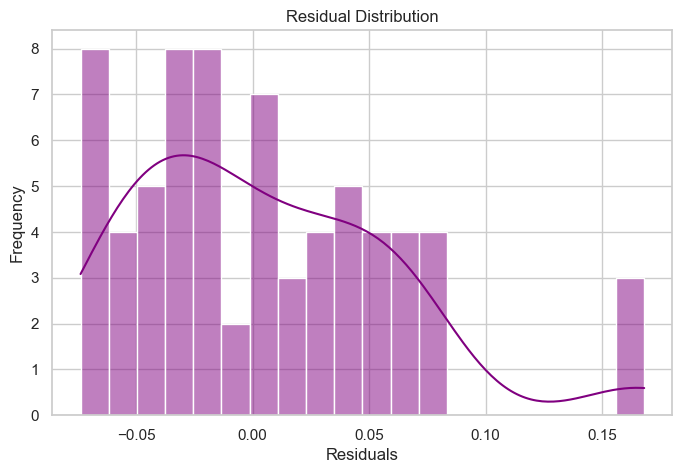

C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\4164040441.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=metrics, palette="magma")


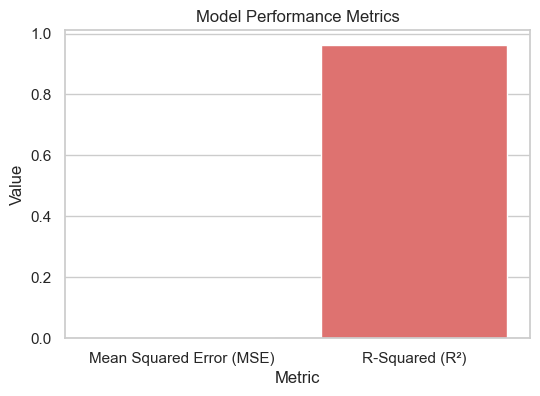

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features and Target")
plt.show()

# 2. Pairplot of Features
sns.pairplot(data[['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']], diag_kind="kde")
plt.suptitle("Feature Pairplot", y=1.02)
plt.show()

# 3. Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(data['Output'], bins=20, kde=True, color='blue')
plt.title("Distribution of Output Variable")
plt.xlabel("Output")
plt.ylabel("Frequency")
plt.show()

# 4. Feature Importance for Random Forest
model1.fit(X_train, y_train)  # Train RandomForestRegressor for feature importance
importances = model1.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 5. Actual vs Predicted Output
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Ideal prediction line
plt.title("Actual vs Predicted Output")
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

# 6. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 7. Performance Metrics Visualization
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
metrics = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "R-Squared (R²)"],
    "Value": [mse, r2]
})

plt.figure(figsize=(6, 4))
sns.barplot(x="Metric", y="Value", data=metrics, palette="magma")
plt.title("Model Performance Metrics")
plt.ylabel("Value")
plt.show()


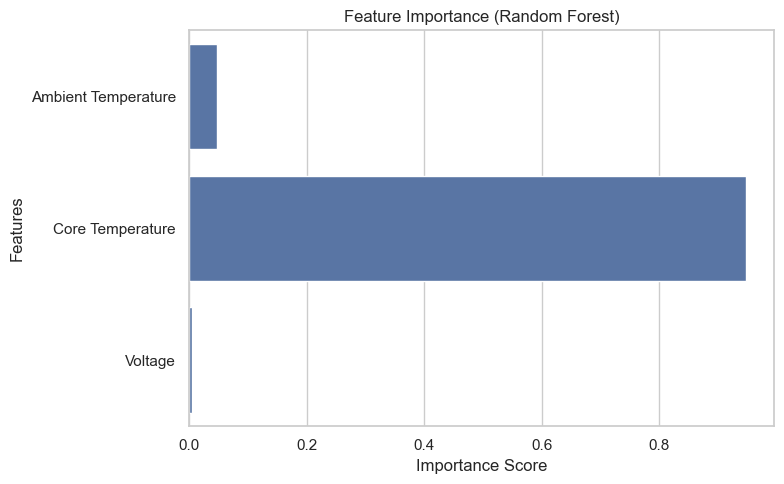

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance from Random Forest
importances = model1.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


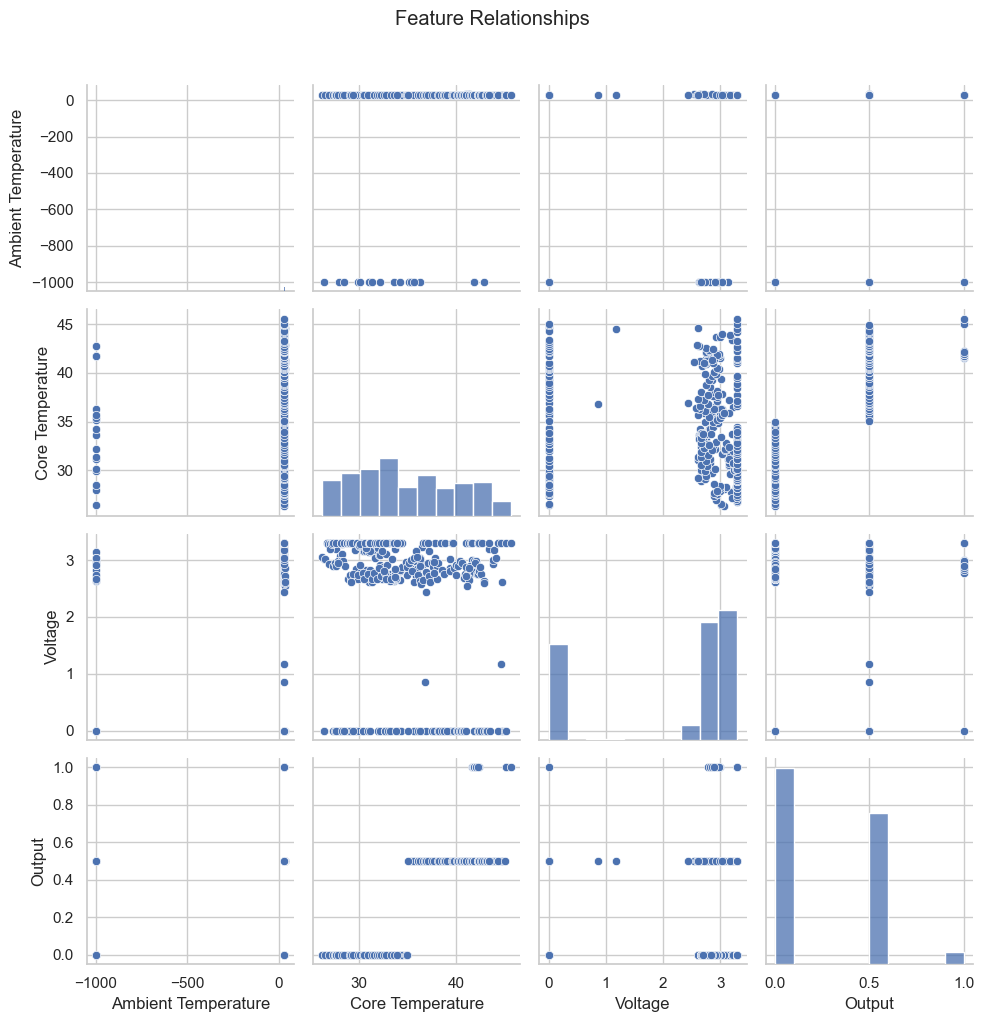

In [12]:
sns.pairplot(data[['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']])
plt.suptitle('Feature Relationships', y=1.02)
plt.tight_layout()
plt.show()


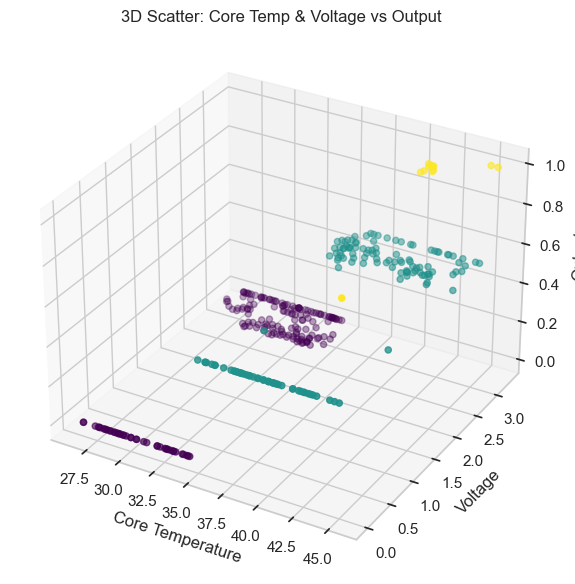

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Core Temperature'], data['Voltage'], data['Output'], c=data['Output'], cmap='viridis')
ax.set_xlabel('Core Temperature')
ax.set_ylabel('Voltage')
ax.set_zlabel('Output')
ax.set_title('3D Scatter: Core Temp & Voltage vs Output')
plt.tight_layout()
plt.show()


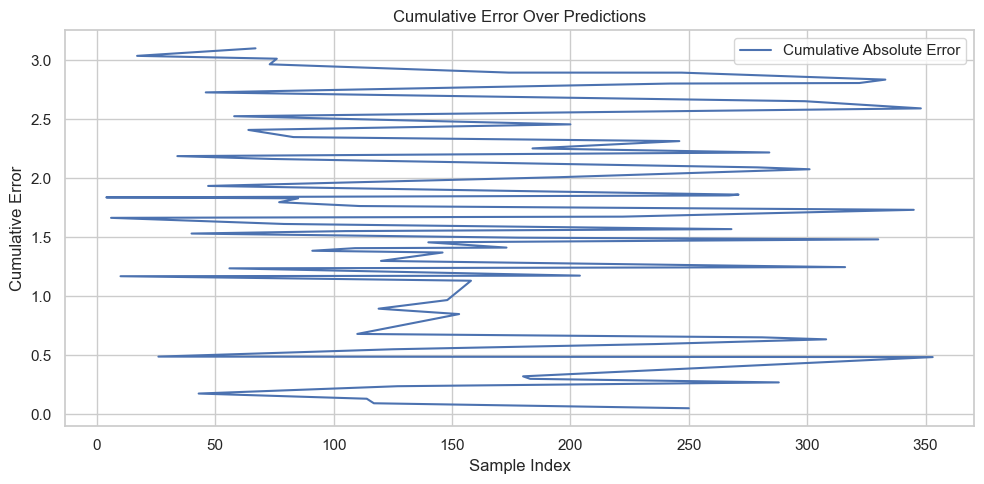

In [14]:
cumulative_error = np.cumsum(np.abs(residuals))

plt.figure(figsize=(10, 5))
plt.plot(cumulative_error, label='Cumulative Absolute Error')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Error')
plt.title('Cumulative Error Over Predictions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


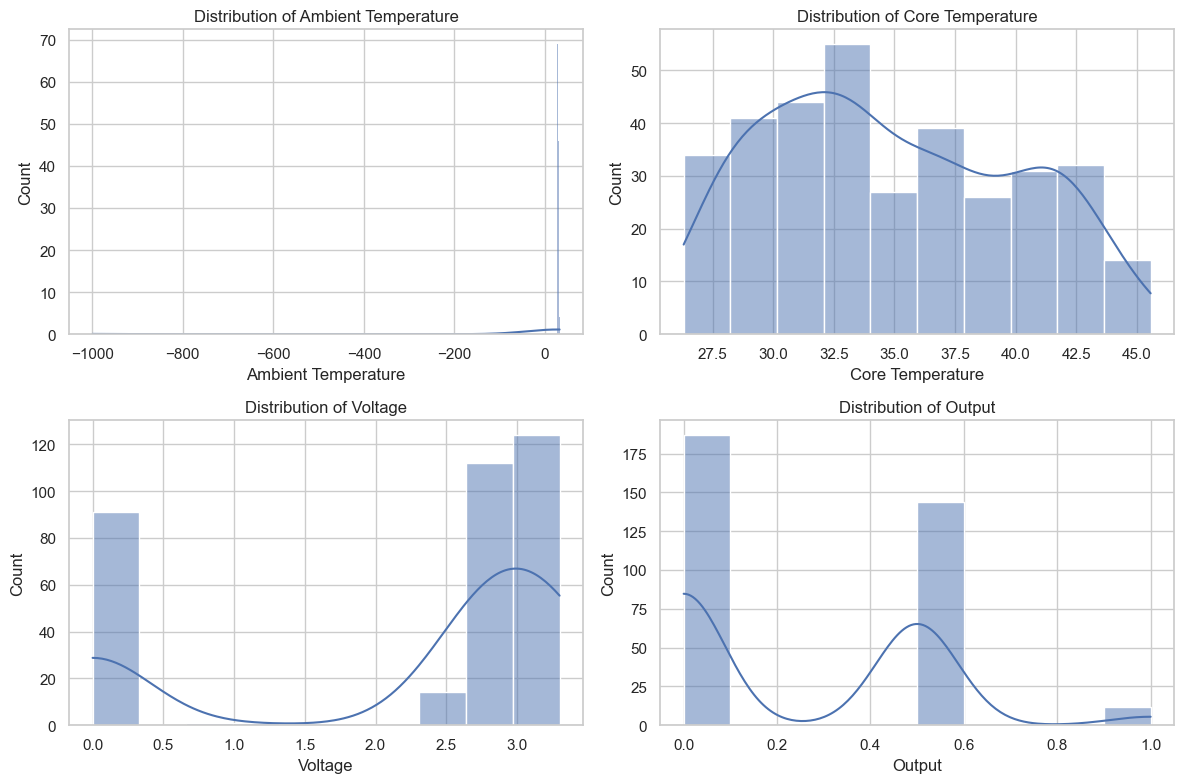

In [15]:
features = ['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


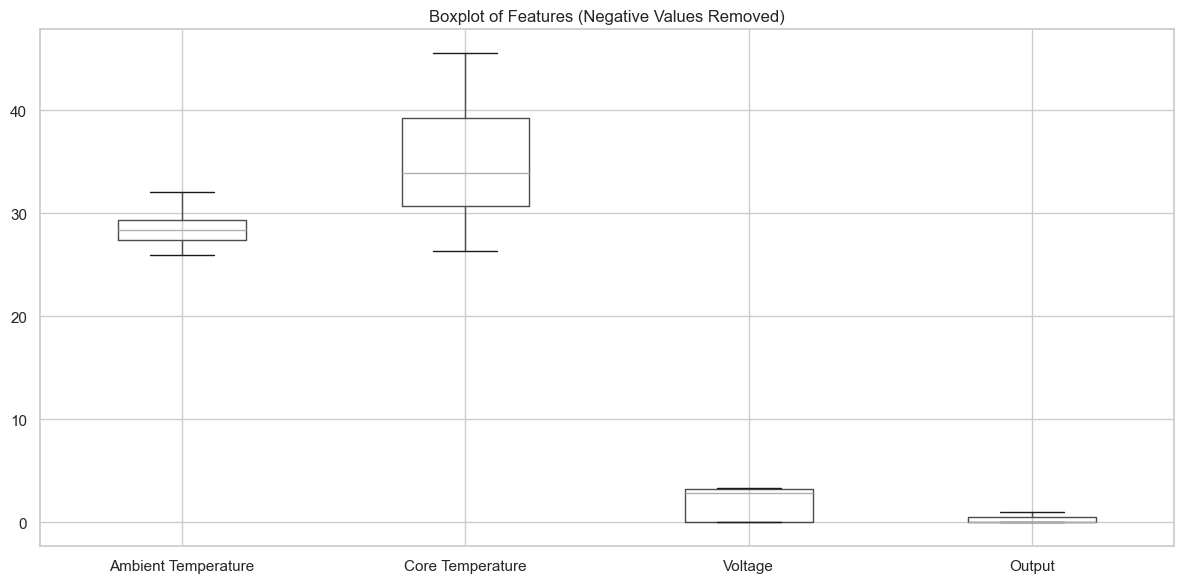

In [20]:
# Filter out negative values from the features
filtered_data = data[['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']].copy()
filtered_data = filtered_data[(filtered_data >= 0).all(axis=1)]

# Plot the boxplot
plt.figure(figsize=(12, 6))
filtered_data.boxplot()
plt.title('Boxplot of Features (Negative Values Removed)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define bins based on the output range
bins = np.linspace(y.min(), y.max(), 4)  # Creating 3 bins (Low, Medium, High)
y_test_class = np.digitize(y_test, bins)
y_pred_class = np.digitize(y_pred, bins)

# Compute classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7681
Precision: 0.9565
Recall: 0.7681
F1 Score: 0.8435


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean Absolute Error (MAE): 0.0449
Mean Squared Error (MSE): 0.0031
Root Mean Squared Error (RMSE): 0.0560
R² Score: 0.9627
Mean Absolute Percentage Error (MAPE): 95461801949415.8125
Accuracy: 0.7681
Precision: 1.0000
Recall: 0.7681
F1 Score: 0.8435


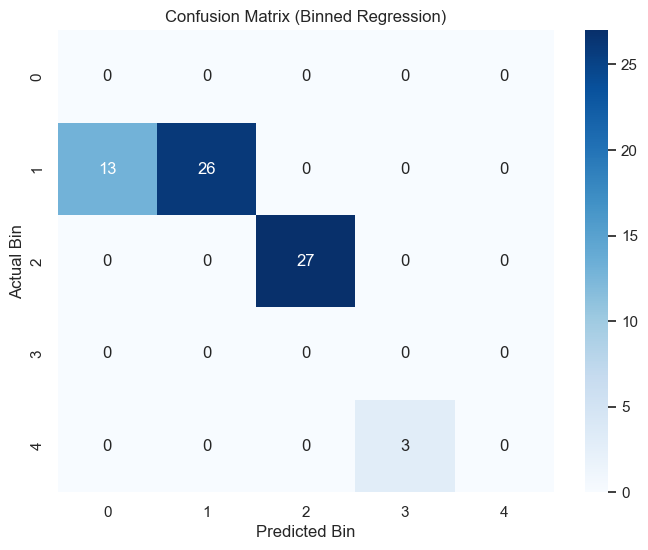

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, 
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Load dataset
data = pd.read_csv('project_25 - Sheet1 (1).csv')

# Clean dataset
data.replace('#NUM!', np.nan, inplace=True)
data.dropna(inplace=True)
for col in ['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Define features and target
X = data[['Ambient Temperature', 'Core Temperature', 'Voltage']]
y = data['Output']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model3 = LinearRegression()

# Ensemble model
ensemble_model = VotingRegressor(
    estimators=[
        ('rf', model1),
        ('gbr', model2),
        ('lr', model3)
    ]
)

# Train model
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred = ensemble_model.predict(X_test)

# ✅ Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# ✅ Convert Regression into Classification (Binning Output)
bins = np.linspace(y.min(), y.max(), 4)  # Create bins for 'Low', 'Medium', 'High'
y_test_class = np.digitize(y_test, bins)
y_pred_class = np.digitize(y_pred, bins)

# ✅ Classification Metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted', zero_division=1)
recall = recall_score(y_test_class, y_pred_class, average='weighted', zero_division=1)
f1 = f1_score(y_test_class, y_pred_class, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ✅ Confusion Matrix (Binned)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Bin")
plt.ylabel("Actual Bin")
plt.title("Confusion Matrix (Binned Regression)")
plt.show()


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer

# Load dataset
data = pd.read_csv('project_25 - Sheet1 (1).csv')

# Clean dataset
data.replace('#NUM!', np.nan, inplace=True)
data.dropna(inplace=True)
for col in ['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Define features and target
X = data[['Ambient Temperature', 'Core Temperature', 'Voltage']]
y = data['Output']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression()
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Convert to Classification Task (Binning)
    binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
    y_test_binned = binning.fit_transform(y_test.values.reshape(-1, 1)).astype(int)
    y_pred_binned = binning.transform(y_pred.reshape(-1, 1)).astype(int)
    
    # Classification Metrics
    accuracy = accuracy_score(y_test_binned, y_pred_binned)
    precision = precision_score(y_test_binned, y_pred_binned, average='weighted', zero_division=0)
    recall = recall_score(y_test_binned, y_pred_binned, average='weighted', zero_division=0)
    f1 = f1_score(y_test_binned, y_pred_binned, average='weighted', zero_division=0)
    
    # Append results
    results.append([name, mae, mse, rmse, r2, mape, accuracy, precision, recall, f1])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²', 'MAPE', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print(results_df)


              Model       MAE       MSE      RMSE        R²      MAPE  \
0      RandomForest  0.005435  0.000768  0.027721  0.990865  1.366667   
1  GradientBoosting  0.001061  0.000004  0.002067  0.999949       inf   
2  LinearRegression  0.129869  0.024083  0.155187  0.713711       inf   

   Accuracy  Precision    Recall  F1 Score  
0  1.000000   1.000000  1.000000  1.000000  
1  0.768116   0.835573  0.768116  0.745690  
2  0.739130   0.821510  0.739130  0.707686  


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\3759487558.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_df, palette='viridis')


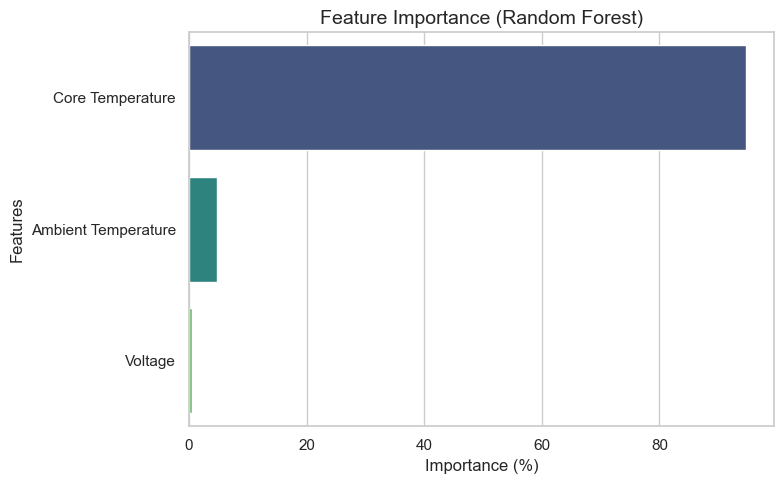

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get trained Random Forest model
rf_model = models["RandomForest"]  # already trained above

# Extract feature importances and convert to percentages
importances = rf_model.feature_importances_
features = X.columns
importance_percent = 100.0 * (importances / importances.sum())

# Create DataFrame for visualization
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance (%)', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\2894145590.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_df, palette='coolwarm')


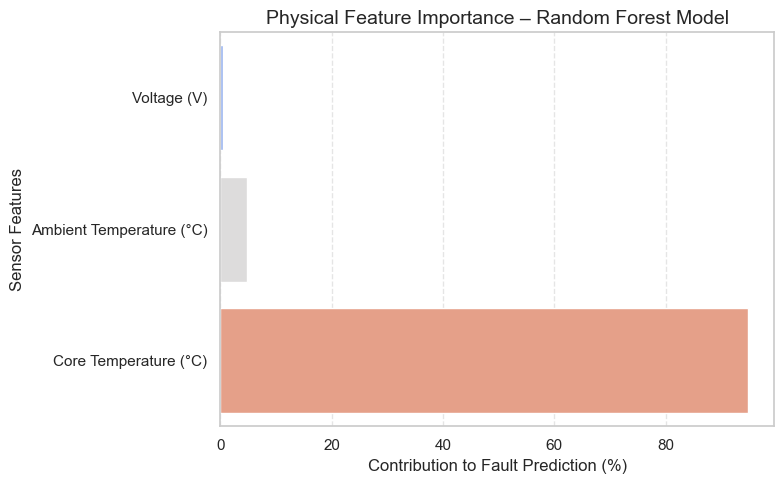

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your model training code has already run and models["RandomForest"] is trained
rf_model = models["RandomForest"]

# Feature importances (in %)
importances = rf_model.feature_importances_
features = ['Ambient Temperature (°C)', 'Core Temperature (°C)', 'Voltage (V)']
importance_percent = 100.0 * (importances / importances.sum())

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance (%)', y='Feature', data=feature_df, palette='coolwarm')
plt.title('Physical Feature Importance – Random Forest Model', fontsize=14)
plt.xlabel('Contribution to Fault Prediction (%)')
plt.ylabel('Sensor Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Feature Importance (%):
                    Feature  Importance (%)
2               Voltage (V)            0.45
0  Ambient Temperature (°C)            4.80
1     Core Temperature (°C)           94.75


C:\Users\rohit\AppData\Local\Temp\ipykernel_21668\4243429411.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_df, palette='viridis')


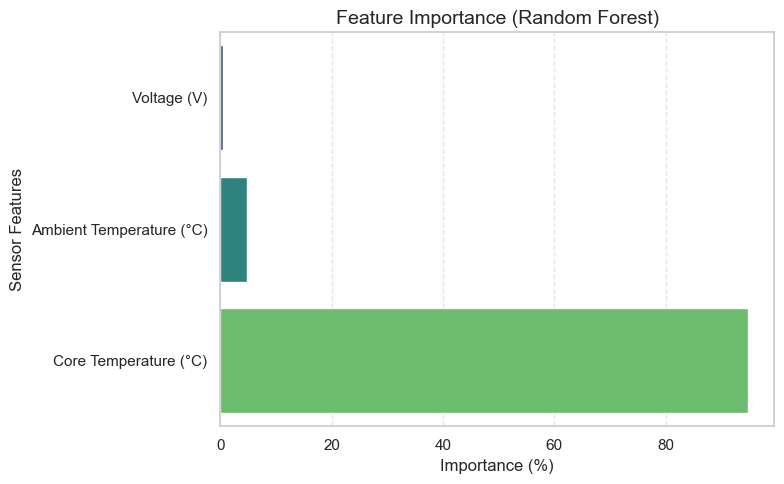

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Get trained Random Forest model
rf_model = models["RandomForest"]

# Extract feature importances
importances = rf_model.feature_importances_
features = ['Ambient Temperature (°C)', 'Core Temperature (°C)', 'Voltage (V)']

# Convert to percentage
importance_percent = (importances / importances.sum()) * 100

# Create a DataFrame with actual percentage values
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance (%)': np.round(importance_percent, 2)  # round to 2 decimal places
}).sort_values(by='Importance (%)', ascending=True)

# Print actual percentage values
print("Feature Importance (%):")
print(feature_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance (%)', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance (%)')
plt.ylabel('Sensor Features')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('project_25 - Sheet1 (1).csv')
data.replace('#NUM!', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert to numeric
for col in ['Ambient Temperature', 'Core Temperature', 'Voltage', 'Output']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Define features and target
X = data[['Ambient Temperature', 'Core Temperature', 'Voltage']]
y = data['Output']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Binning into classes
binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_test_binned = binning.fit_transform(y_test.values.reshape(-1, 1)).astype(int).flatten()
y_pred_binned = binning.transform(y_pred.reshape(-1, 1)).astype(int).flatten()

# Get correctly classified indices
correct_indices = y_test_binned == y_pred_binned

# Combine for display
results_df = X_test.copy()
results_df['Actual Output'] = y_test.values
results_df['Predicted Output'] = y_pred
results_df['Actual Class'] = y_test_binned
results_df['Predicted Class'] = y_pred_binned
correctly_classified_df = results_df[correct_indices]

# Show correctly classified samples
print("Correctly Classified Samples:")
print(correctly_classified_df.head(10))  # show top 10 for brevity


Correctly Classified Samples:
     Ambient Temperature  Core Temperature  Voltage  Actual Output  \
250                29.55             37.17     2.71            0.5   
117                27.45             32.47     3.30            0.0   
114                27.41             32.21     0.00            0.0   
43                 27.69             32.55     0.00            0.0   
127                27.57             33.73     3.30            0.0   
288                30.13             42.51     2.76            0.5   
183                27.41             31.71     2.74            0.0   
180                27.37             31.13     2.82            0.0   
353                30.01             45.07     3.30            1.0   
26                 27.25             30.03     0.00            0.0   

     Predicted Output  Actual Class  Predicted Class  
250              0.50             1                1  
117              0.00             0                0  
114              0.00             

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [24]:
# Add class labels (change according to your binning meaning)
class_labels = {
    0: 'Minor',
    1: 'Moderate',
    2: 'Warning',
    3: 'Severe',
    4: 'Critical'
}

# Apply labels
correctly_classified_df['Actual Label'] = correctly_classified_df['Actual Class'].map(class_labels)
correctly_classified_df['Predicted Label'] = correctly_classified_df['Predicted Class'].map(class_labels)

# Show labeled results
print(correctly_classified_df[['Ambient Temperature', 'Core Temperature', 'Voltage',
                               'Actual Output', 'Predicted Output',
                               'Actual Label', 'Predicted Label']].head(10))


     Ambient Temperature  Core Temperature  Voltage  Actual Output  \
250                29.55             37.17     2.71            0.5   
117                27.45             32.47     3.30            0.0   
114                27.41             32.21     0.00            0.0   
43                 27.69             32.55     0.00            0.0   
127                27.57             33.73     3.30            0.0   
288                30.13             42.51     2.76            0.5   
183                27.41             31.71     2.74            0.0   
180                27.37             31.13     2.82            0.0   
353                30.01             45.07     3.30            1.0   
26                 27.25             30.03     0.00            0.0   

     Predicted Output Actual Label Predicted Label  
250              0.50     Moderate        Moderate  
117              0.00        Minor           Minor  
114              0.00        Minor           Minor  
43               

In [25]:
print(f"Total test samples: {len(y_test)}")
print(f"Correctly classified samples: {correctly_classified_df.shape[0]}")
print(f"Accuracy from correct classification: {(correctly_classified_df.shape[0] / len(y_test)) * 100:.2f}%")


Total test samples: 69
Correctly classified samples: 69
Accuracy from correct classification: 100.00%


In [26]:
# Categorize classes into operational statuses
def categorize_status(cls):
    if cls in [0, 1]:
        return 'Normal Range'
    elif cls == 2:
        return 'Early Warning'
    elif cls in [3, 4]:
        return 'Critical'
    else:
        return 'Unknown'

# Add Status column based on Predicted Class
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

status_df = pd.DataFrame({
    'Ambient Temperature (°C)': X_test_reset['Ambient Temperature'],
    'Core Temperature (°C)': X_test_reset['Core Temperature'],
    'Voltage (V)': X_test_reset['Voltage'],
    'Actual Output': y_test_reset,
    'Predicted Output': y_pred,
    'Predicted Class': y_pred_binned.flatten()
})

# Apply categorization
status_df['Status'] = status_df['Predicted Class'].apply(categorize_status)

# Separate each category
normal_df = status_df[status_df['Status'] == 'Normal Range']
early_warning_df = status_df[status_df['Status'] == 'Early Warning']
critical_df = status_df[status_df['Status'] == 'Critical']

# Print counts and samples
print(f"🟢 Normal Range Samples: {len(normal_df)}")
print(normal_df.head(), "\n")

print(f"🟡 Early Warning Samples: {len(early_warning_df)}")
print(early_warning_df.head(), "\n")

print(f"🔴 Critical Samples: {len(critical_df)}")
print(critical_df.head(), "\n")


🟢 Normal Range Samples: 69
   Ambient Temperature (°C)  Core Temperature (°C)  Voltage (V)  \
0                     29.55                  37.17         2.71   
1                     27.45                  32.47         3.30   
2                     27.41                  32.21         0.00   
3                     27.69                  32.55         0.00   
4                     27.57                  33.73         3.30   

   Actual Output  Predicted Output  Predicted Class        Status  
0            0.5               0.5                1  Normal Range  
1            0.0               0.0                0  Normal Range  
2            0.0               0.0                0  Normal Range  
3            0.0               0.0                0  Normal Range  
4            0.0               0.0                0  Normal Range   

🟡 Early Warning Samples: 0
Empty DataFrame
Columns: [Ambient Temperature (°C), Core Temperature (°C), Voltage (V), Actual Output, Predicted Output, Predicted Cl